In [27]:
#other
import os
import importlib

import numpy as np

from cplap_with_beef import Organizer
importlib.reload(Organizer)

from cplap_with_beef import QE_Helper
importlib.reload(QE_Helper)

<module 'cplap_with_beef.QE_Helper' from '/Users/andrewtimmins/Documents/CMU/Research/QE_ASE/dsProject/CPLAP_with_BEEF/src/cplap_with_beef/QE_Helper.py'>

In [28]:
#Define the relationships of species

os.chdir("/Users/andrewtimmins/Documents/CMU/Research/QE_ASE/dsProject/CPLAP_with_BEEF/tests")

current_directory = os.getcwd()

phases = [{
                'type':'primary',
                'species' : {
                    'Ba':1,
                    'Sn':1,
                    'O':3,
                },
                'dft_output_path': f"{current_directory}/useful_test_files/BaSnO3_espresso.pwo"
            },
            {
                'species': {
                    'Ba':1,
                    'O':1,
                },
                'type':'competing',
                'dft_output_path': f"{current_directory}/useful_test_files/BaO_espresso.pwo",
            },
            {
                'species': {
                    'Sn':1,
                    'O':2,
                },
                'type':'competing',
                'dft_output_path': f"{current_directory}/useful_test_files/SnO2_espresso.pwo",
            },
            {
                'species': {
                    'Ba':2,
                    'Sn':1,
                    'O':4,
                },
                'type':'competing',
                'dft_output_path': f"{current_directory}/useful_test_files/Ba2SnO4_espresso.pwo",
            },
            {
                'species':{
                    'Sn':1,
                    'O':1,
                },
                'type':'competing',
                'dft_output_path': f"{current_directory}/useful_test_files/SnO_espresso.pwo",
            },
            {
                'species': {
                    'Ba':1,
                },
                'type':'element',
                'dft_output_path': f"{current_directory}/useful_test_files/Ba_espresso.pwo",
            },
            {
                'species': {
                    'Sn':1,
                },
                'type':'element',
                'dft_output_path': f"{current_directory}/useful_test_files/Sn_espresso.pwo",
            },
            {
                'species': {
                    'O':1,
                },
                'type':'element',
                'dft_output_path': f"{current_directory}/useful_test_files/O_espresso.pwo",
            }]

In [29]:
from cplap_with_beef import Organizer
importlib.reload(Organizer)

os.environ['CPLAP_DIR'] = "/Users/andrewtimmins/Documents/CMU/Research/QE_ASE/dsProject/packages/cplap-master"

organizer = Organizer.Organizer(debug_bool=False,grid_spacing = 0.1)

for phase in phases:
    print(f"\nAdding {phase['species']}")
    organizer.addPhase(phase['type'],phase['species'],phase['dft_output_path'])

organizer.generate_chemical_potentials()

dependent_species = 'O'
organizer.organize_CPLAP_interaction(dependent_species)



Adding {'Ba': 1, 'Sn': 1, 'O': 3}
Length of raw_energies_per_atom: 2001

Adding {'Ba': 1, 'O': 1}
Length of raw_energies_per_atom: 2001

Adding {'Sn': 1, 'O': 2}
Length of raw_energies_per_atom: 2001

Adding {'Ba': 2, 'Sn': 1, 'O': 4}
Length of raw_energies_per_atom: 2001

Adding {'Sn': 1, 'O': 1}
Length of raw_energies_per_atom: 2001

Adding {'Ba': 1}
Length of raw_energies_per_atom: 2001

Adding {'Sn': 1}
Length of raw_energies_per_atom: 2001

Adding {'O': 1}
Length of raw_energies_per_atom: 2001
item: cplap_output_beef_1589.dat
item: cplap_output_beef_289.dat
item: cplap_output_beef_276.dat
item: cplap_output_beef_510.dat
item: cplap_output_beef_504.dat
item: cplap_output_beef_1238.dat
item: cplap_output_beef_262.dat
item: cplap_output_beef_1210.dat
item: cplap_output_beef_1576.dat
item: cplap_output_beef_538.dat
item: cplap_output_beef_1562.dat
item: cplap_output_beef_1204.dat
item: cplap_output_beef_1953.dat
item: cplap_output_beef_909.dat
item: cplap_output_beef_1947.dat
item: c

In [31]:
#organizer.process_all_BEEF_results()
from cplap_with_beef import Data_Analyzer
importlib.reload(Data_Analyzer)

#organizer.process_all_BEEF_results()
#organizer.process_BEEF_result(beef_idx=2000)
organizer.agregrate_all_beef_entries()


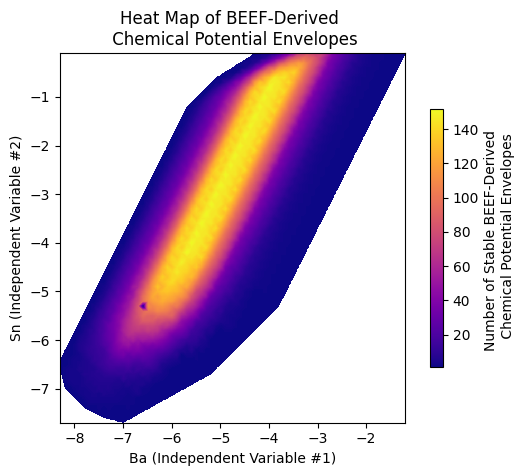

In [32]:
from cplap_with_beef import Data_Analyzer
importlib.reload(Data_Analyzer)

organizer.analyzer.read_in_agregrate_file(force_read_in=True)

columns = [0,1]
column_names = ['Ba (Independent Variable #1)','Sn (Independent Variable #2)']
limit = 300

organizer.analyzer.generate_2d_heat_map(columns,column_names,limit)